In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

from icecream import ic
# Add column names for the iris dataset
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv('iris.data',header = None, names=columns)


df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


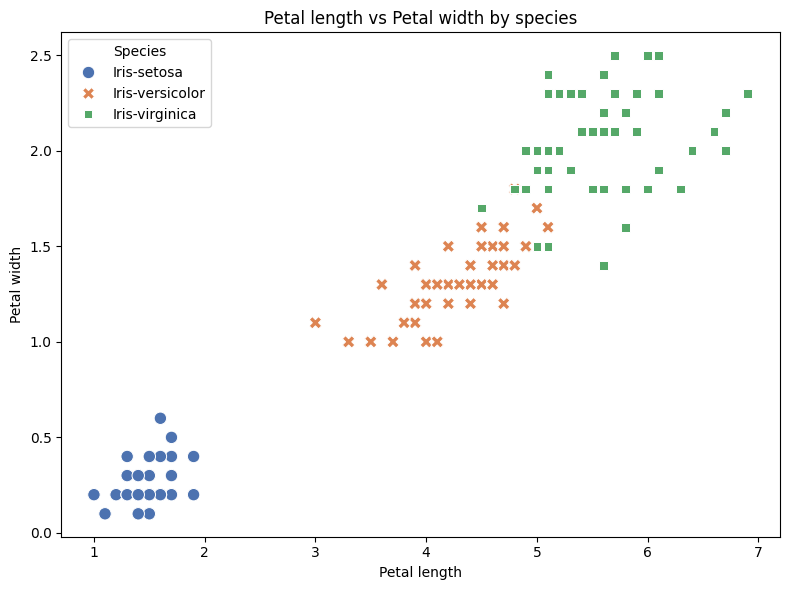

In [107]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', style='species', palette='deep', s=80)
plt.title('Petal length vs Petal width by species')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(title='Species')
plt.tight_layout()
plt.show()

Daten wurden importiert. nun sollen Sie einigermaßen visualisiert werden


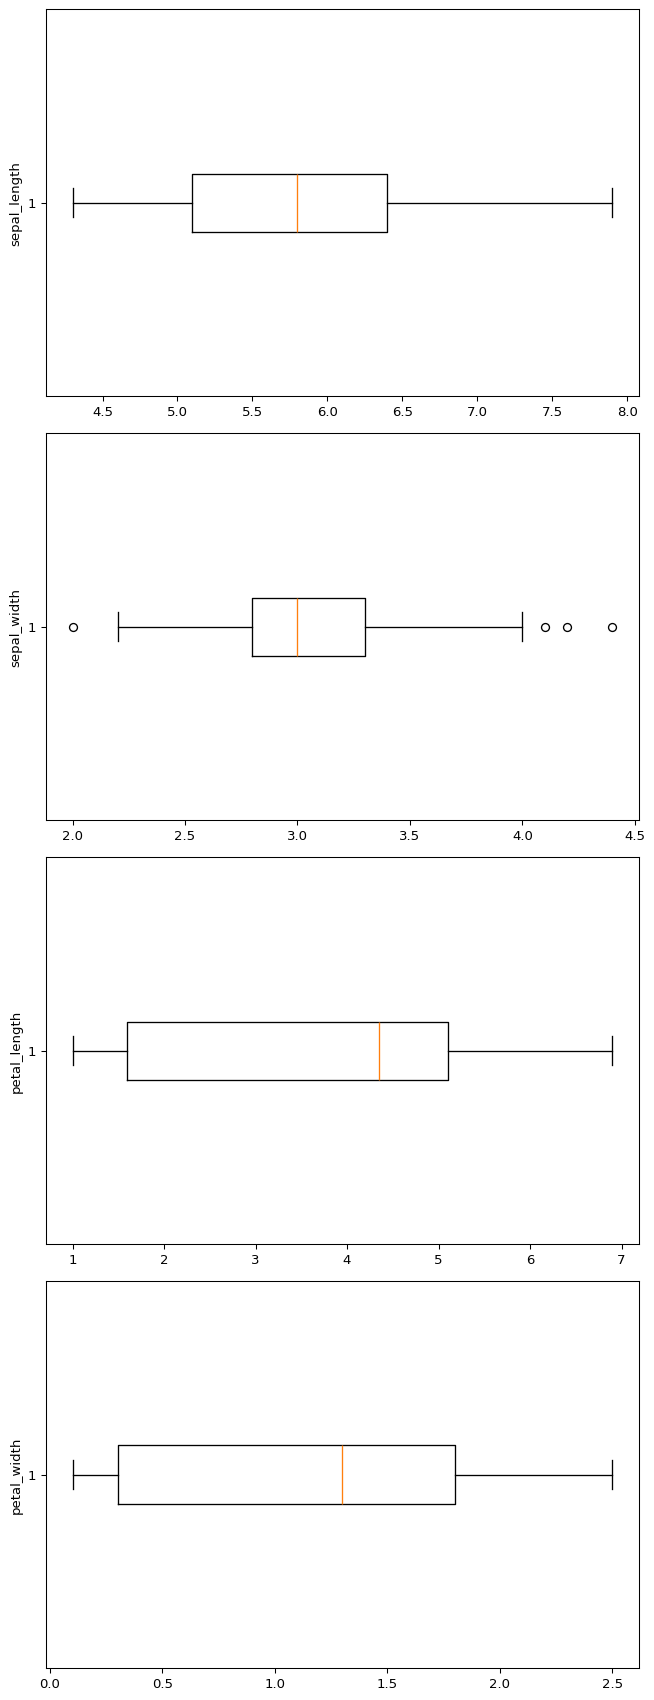

In [ ]:


# Only plot numeric columns to avoid errors with non-numeric data (e.g. 'species')
num_cols = numeric_cols  # uses numeric_cols already defined in the notebook

fig, axs = plt.subplots(len(num_cols), 1, figsize=(7, 18), dpi=95)
for i, col in enumerate(num_cols):
    axs[i].boxplot(df[col].dropna().astype(float), vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

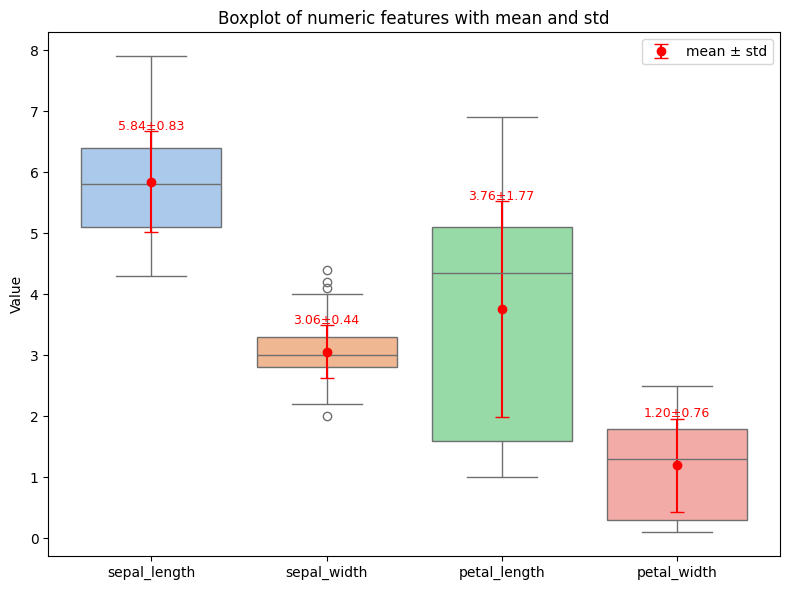

In [ ]:
df.describe()

numeric_cols = columns[:-1]
means = df[numeric_cols].mean()
stds = df[numeric_cols].std()

plt.figure(figsize=(8,6))
sns.boxplot(data=df[numeric_cols], palette='pastel')
x = list(range(len(numeric_cols)))
plt.errorbar(x, means, yerr=stds, fmt='o', color='red', capsize=5, label='mean ± std')
plt.scatter(x, means, color='red')
for i, (m, s) in enumerate(zip(means, stds)):
    plt.text(i, m + s + 0.02, f'{m:.2f}±{s:.2f}', ha='center', color='red', fontsize=9)

plt.title('Boxplot of numeric features with mean and std')
plt.ylabel('Value')
plt.xticks(ticks=x, labels=numeric_cols)
plt.legend()
plt.tight_layout()
plt.show()

Heatmap of correlated Features



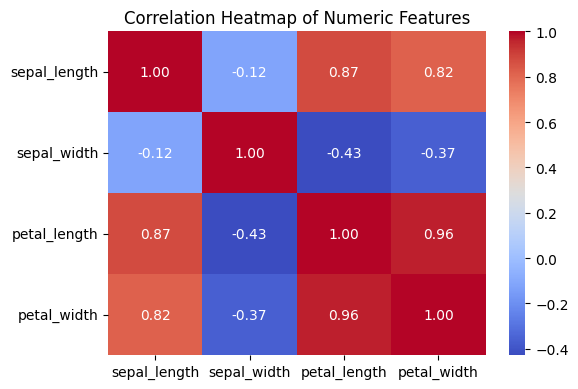

In [62]:
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

Vizualize target variable Distribution


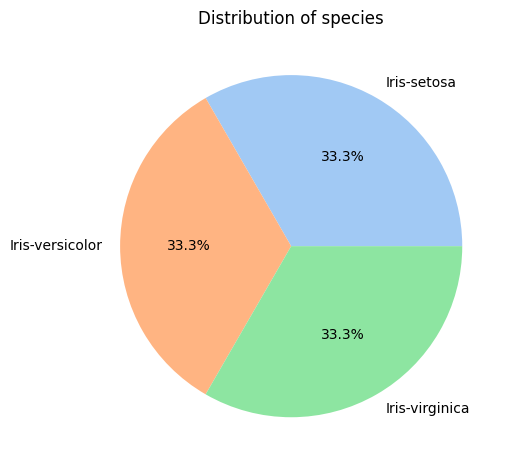

In [63]:
plt.pie(df['species'].value_counts(), labels=df['species'].unique(), autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Distribution of species")
plt.tight_layout()
plt.show()

Sooo und nun widmen wir uns der Linearen Regression an! 

Dazu brauchen wir dann die Vektoren anhand eine Unterscheidung gehen könnte. 

y = target
x = features


In [106]:
model = LogisticRegression(max_iter=100, random_state=0)

X = df[numeric_cols]

Y = df['species']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.58, random_state=42)

model.fit(X_train, Y_train)

acc = accuracy_score(Y_test, model.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")




Logistic Regression model accuracy: 98.85%
